/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1,14,18,20,22,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
<ipython-input-3-338b1255120c>:23: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  coloumn_names = df_fars.iloc[[30]].dropna(True)


Decision tree accuracy: 0.7583408476104598
Random Forest accuracy: 0.7791149337587571


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


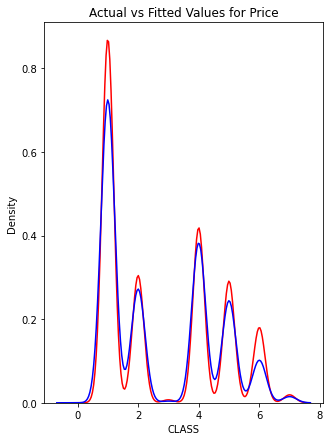

In [ ]:
# print('use GridSearchCV to find the best hyperparameters for each classifier!')
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
from sklearn.svm import SVC
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import numpy as np
from sklearn.decomposition import IncrementalPCA
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import graphviz
from sklearn import tree

df_fars = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/fars.csv')
coloumn_names = df_fars.iloc[[30]].dropna(True)
df_fars = df_fars.drop(df_fars.index[0:33])
coloumn_names = ['Case State', 'Age', 'Sex', 'Person_Type', 'Seating_Position', 'Restraint_system_used',
                 'Air_Bag_availability/Deployment', 'Ejection', 'Ejection_Path', 'Extrication', 'Non_motorist_location',
                 'Police_reported_alcohol_involvment', 'Method_alcohol_determination', 'Alcohol_test_type',
                 'Alcohol_test_results', 'Police_reported_drug_involvment', 'Method_of_drug_determination',
                 'Drug_test_type', 'Drug_test_results_(1_of_3_)', 'Drug_test_type_(2_of_3_)',
                 'Drug_test_results_(2_of_3_)', 'Drug_test_type_(3_of_3_)', 'Drug_test_results_(3_of_3_)',
                 'Hispanic_origin', 'Taken_to_hospital', ' RELATED_FACTOR_(1)-PERSON_LEVEL',
                 ' RELATED_FACTOR_(2)-PERSON_LEVEL',  ' RELATED_FACTOR_(3)-PERSON_LEVEL', 'RACE', 'CLASS']

df_fars = pd.DataFrame(data=df_fars.drop(df_fars.iloc[:, 30:], axis=1))
df_fars.columns = coloumn_names

le = preprocessing.LabelEncoder()
objList = df_fars.select_dtypes(include = "object").columns

for feat in coloumn_names:
    df_fars[feat] = le.fit_transform(df_fars[feat].astype(str))


x = df_fars.iloc[:, :29]
y = df_fars['CLASS']


scaler = MinMaxScaler()
scaler.fit(df_fars)
scaled = scaler.fit_transform(df_fars)
scaled_df_fars = pd.DataFrame(scaled, columns=df_fars.columns)


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)


DT = DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train.values.ravel())
RF = RandomForestClassifier(criterion='entropy',n_estimators=1000).fit(X_train, y_train.values.ravel())

print('Decision tree accuracy:',accuracy_score(y_test, DT.predict(X_test))) #decision tree accuracy: 0.759093637454982
y_pred = RF.predict(X_test)
print('Random Forest accuracy:',accuracy_score(y_test, y_pred)) #Random Forest accuracy: 0.7830132052821128


# tree.plot_tree(DT)

plt.figure(figsize=(5, 7))


ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Price')

plt.savefig('hist_fit.png')
plt.show()
plt.close()


# dot_data = tree.export_graphviz(DT, out_file=None) 
# graph = graphviz.Source(dot_data) 
# graph.render("iris") 


# dot_data = tree.export_graphviz(clf, out_file=None, 
#                      feature_names=iris.feature_names,  
#                      class_names=iris.target_names,  
#                      filled=True, rounded=True,  
#                      special_characters=True)  
# graph = graphviz.Source(dot_data)  
# graph

# # Set the parameters by cross-validation
# parameters = [{'kernel': ['rbf'],
#                 'gamma': [1e-4, 0.01, 0.1, 0.5],
#                 'C': [1, 10, 100]}]
# print("# Tuning hyper-parameters")
# clf = GridSearchCV(SVC(), parameters, cv=5)
# clf.fit(X_train, y_train.values.ravel())


# print('best parameters:')
# print(clf.best_params_)
# print('-------------------------------------')
# means = clf.cv_results_['mean_test_score']
# stds = clf.cv_results_['std_test_score']
# for mean, std, params in zip(means, stds, clf.cv_results_['params']):
#     print("%0.3f (+/-%0.03f) for %r"
#           % (mean, std * 2, params))


# SVM_linear = SVC(kernel="linear", C=100).fit(X_train, y_train.values.ravel())
# SVM_rbf = SVC(kernel="rbf", C=1000, gamma=1e-5).fit(X_train, y_train.values.ravel())

# print('linearSVM accuracy:',accuracy_score(y_test, SVM_linear.predict(X_test)))
# print('rbf_SVM accuracy:',accuracy_score(y_test, SVM_rbf.predict(X_test)))





# Decide the number of PCA components based on the retained information
# pca = PCA(random_state=88)
# pca.fit(X_train)
# explained_variance = np.cumsum(pca.explained_variance_ratio_)
# plt.vlines(x=5, ymax=1, ymin=0, colors="r", linestyles="--")
# plt.hlines(y=0.95, xmax=40, xmin=0, colors="g", linestyles="--")
# plt.plot(explained_variance)


# # Train the PCA model 
# pca_final = IncrementalPCA(n_components=5)
# df_train_pca = pca_final.fit_transform(X_train)
 
# # Note that the above can be automated like this: (without using plot)
# pca_final = PCA(0.95)
# df_train_pca = pca_final.fit_transform(X_train)
 
# # Check the correlations between components
# corr_mat = np.corrcoef(df_train_pca.transpose())
# plt.figure(figsize=[15,8])
# sns.heatmap(corr_mat)
# plt.show()

# # Apply PCA model to the test data
# X_test = pca_final.transform(X_test)

# # Train the Logistic Regression model
# linear_svm = SVM_linear = SVC(kernel="linear", C=100)
# svm_pca = linear_svm.fit(X_train, y_train.values.ravel())

# pred_test = svm_pca.predict_proba(X_test)
# roc_auc = roc_auc_score(y_test, pred_test, multi_class='ovr')
# print(roc_auc)
